In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download barelydedicated/bank-customer-churn-modeling

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 88.3MB/s]


In [ ]:
!unzip bank-customer-churn-modeling

Archive:  bank-customer-churn-modeling.zip
  inflating: Churn_Modelling.csv     


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9613,9614,15737025,Roberts,635,France,Male,33,1,0.00,3,0,0,178067.33,1
2813,2814,15600934,Randell,758,France,Female,52,7,125095.94,1,1,0,171189.83,1
7426,7427,15790630,Olisaemeka,619,France,Female,48,4,0.00,1,0,0,18094.96,1
4437,4438,15779522,Efimov,736,France,Female,24,0,0.00,2,1,0,109355.73,1
5373,5374,15709412,H?,776,Spain,Male,30,6,0.00,2,0,1,63908.86,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
yes = df[df.Exited == 1].Tenure
no = df[df.Exited == 0].Tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


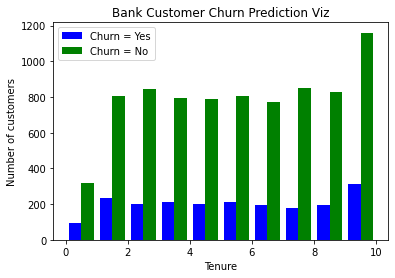

In [ ]:
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Bank Customer Churn Prediction Viz")

plt.hist([yes,no], color = ['blue','green'], label = ['Churn = Yes','Churn = No'])
plt.legend()
plt.show()

In [ ]:
col = ['Age','CreditScore','Balance','EstimatedSalary']
df[col] = MinMaxScaler().fit_transform(np.array(df[col]))

In [ ]:
df['EstimatedSalary']

0       0.506735
1       0.562709
2       0.569654
3       0.469120
4       0.395400
          ...   
9995    0.481341
9996    0.508490
9997    0.210390
9998    0.464429
9999    0.190914
Name: EstimatedSalary, Length: 10000, dtype: float64

In [ ]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [ ]:
df[df['Exited'] == 1].shape

(2037, 11)

In [ ]:
df[df['Exited'] == 0].shape

(7963, 11)

In [ ]:
x_sm, y_sm = SMOTE(sampling_strategy='minority').fit_resample(x,y)
print(f"Before: \n{y.value_counts()} \nNow: \n{y_sm.value_counts()}")

Before: 
0    7963
1    2037
Name: Exited, dtype: int64 
Now: 
1    7963
0    7963
Name: Exited, dtype: int64


In [ ]:
# artificial neural network model

def ANN(x_train, x_test, y_train, y_test, weight=-1):
    '''
    Creates a model with 3 layers.
    Prints the classification results.
    Returns the model.
    '''
    l = len(x_train.columns)
    model = keras.Sequential()
    model.add(keras.layers.Dense(l, input_dim = l, activation = 'relu'))
    model.add(keras.layers.Dense(l/2, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))

    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    if weight == -1:
        model.fit(x_train, y_train, epochs = 100,)
    else:
        model.fit(x_train, y_train, epochs = 100, class_weight = weight)

    yp = np.round(model.predict(x_test))

    print(classification_report(y_true= y_test, y_pred = yp))
    return model

In [ ]:
model = ANN(*train_test_split(x_sm, y_sm, test_size=0.25, random_state=42))

Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 0.6856 - accuracy: 0.5628
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 0.6565 - accuracy: 0.6306
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 0.6266 - accuracy: 0.6733
Epoch 4/100
374/374 [==============================] - 1s 3ms/step - loss: 0.6003 - accuracy: 0.6929
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.5739 - accuracy: 0.7184
Epoch 6/100
374/374 [==============================] - 1s 3ms/step - loss: 0.5535 - accuracy: 0.7281
Epoch 7/100
374/374 [==============================] - 1s 3ms/step - loss: 0.5390 - accuracy: 0.7381
Epoch 8/100
374/374 [==============================] - 1s 3ms/step - loss: 0.5283 - accuracy: 0.7508
Epoch 9/100
374/374 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.7537
Epoch 10/100
374/374 [==============================] - 1s 3ms/step - loss: 0.5119 - accura